In [1]:
import yfinance as yf
import os
import pandas as pd

In [2]:
btc_ticker = yf.Ticker("BTC-USD")

In [3]:
if os.path.exists("btc.csv"):
    btc = pd.read_csv("btc.csv", index_col=0)
else:
    btc = btc_ticker.history(period="max")
    btc.to_csv("btc.csv")

In [4]:
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-11 00:00:00+00:00,70575.734375,71256.234375,69571.812500,70060.609375,30153382941,0.0,0.0
2024-04-12 00:00:00+00:00,70061.382812,71222.742188,65254.835938,67195.867188,44129299406,0.0,0.0
2024-04-13 00:00:00+00:00,67188.375000,67931.429688,60919.105469,63821.472656,52869738185,0.0,0.0


In [5]:
btc.index = pd.to_datetime(btc.index)

In [6]:
del btc["Dividends"]# delete dividends and stock splits column
del btc["Stock Splits"]

In [7]:
btc.columns = [c.lower() for c in btc.columns] #convert to lower case

<Axes: xlabel='Date'>

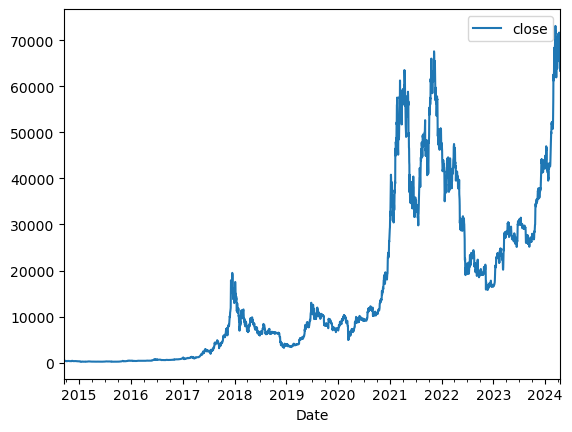

In [8]:
btc.plot.line(y="close", use_index=True)

In [9]:
wiki = pd.read_csv("wikipedia_edits_btc.csv", index_col=0, parse_dates=True)

In [10]:
wiki

,edit_count,sentiment,neg_sentiment
2009-04-06,0.133333,-0.018351,0.025000
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2024-04-11,0.333333,-0.096713,0.133333
2024-04-12,0.333333,-0.096713,0.133333
2024-04-13,0.333333,-0.096713,0.133333
2024-04-14,0.333333,-0.096713,0.133333


### Preparing data for machine learning

In [11]:
wiki.index = wiki.index.tz_localize('UTC')

In [12]:
btc = btc.merge(wiki, left_index=True, right_index=True)

In [13]:
btc["tomorrow"] = btc["close"].shift(-1)

In [14]:
btc["target"] = (btc["tomorrow"] > btc["close"]).astype(int)

In [15]:
btc["target"].value_counts()

target
1    1855
0    1644
Name: count, dtype: int64

In [16]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232192,0.532718,424.440002,0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990,0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992,1
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014,0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008,1
...,...,...,...,...,...,...,...,...,...,...
2024-04-11 00:00:00+00:00,70575.734375,71256.234375,69571.812500,70060.609375,30153382941,0.333333,-0.096713,0.133333,67195.867188,0
2024-04-12 00:00:00+00:00,70061.382812,71222.742188,65254.835938,67195.867188,44129299406,0.333333,-0.096713,0.133333,63821.472656,0
2024-04-13 00:00:00+00:00,67188.375000,67931.429688,60919.105469,63821.472656,52869738185,0.333333,-0.096713,0.133333,65738.726562,1
2024-04-14 00:00:00+00:00,63836.230469,65824.429688,62205.851562,65738.726562,49084320047,0.333333,-0.096713,0.133333,63354.070312,0


In [17]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

train = btc.iloc[:-200]
test = btc.iloc[-200:]

predictors = ["close", "volume", "open", "high", "low", "edit_count", "sentiment", "neg_sentiment"]
model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=50, random_state=1)

In [18]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

0.5882352941176471

### Evaluating error with backtesting

In [19]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

In [20]:
def backtest(data, model, predictors, start=1095, step=150):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

### Using an XGBoost model

In [21]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [21]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1, learning_rate=.1, n_estimators=200)
predictions = backtest(btc, model, predictors)

In [22]:
predictions["predictions"].value_counts()

predictions
1    1355
0    1049
Name: count, dtype: int64

In [23]:
precision_score(predictions["target"], predictions["predictions"])

0.5047970479704798

### Improving precision with trends

In [24]:
def compute_rolling(btc):
    horizons = [2,7,60,365]
    new_predictors = ["close", "sentiment", "neg_sentiment"]

    for horizon in horizons:
        rolling_averages = btc.rolling(horizon, min_periods=1).mean()

        ratio_column = f"close_ratio_{horizon}"
        btc[ratio_column] = btc["close"] / rolling_averages["close"]
        
        edit_column = f"edit_{horizon}"
        btc[edit_column] = rolling_averages["edit_count"]

        rolling = btc.rolling(horizon, closed='left', min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        btc[trend_column] = rolling["target"]

        new_predictors+= [ratio_column, trend_column, edit_column]
    return btc, new_predictors

In [25]:
btc, new_predictors = compute_rolling(btc.copy())

In [26]:
predictions = backtest(btc, model, new_predictors)

In [27]:
precision_score(predictions["target"], predictions["predictions"])

0.5257548845470693

In [28]:
predictions

,target,predictions
2017-09-16 00:00:00+00:00,0,0
2017-09-17 00:00:00+00:00,1,1
2017-09-18 00:00:00+00:00,0,0
2017-09-19 00:00:00+00:00,0,1
2017-09-20 00:00:00+00:00,0,1
...,...,...
2024-04-11 00:00:00+00:00,0,0
2024-04-12 00:00:00+00:00,0,1
2024-04-13 00:00:00+00:00,1,1
2024-04-14 00:00:00+00:00,0,1


### LSTM

In [36]:
# Import matplotlib and seaborn for data visualization. Matplotlib is a plotting library, 
# and seaborn is a statistical data visualization library that builds on matplotlib.
import matplotlib.pyplot as plt
import seaborn as sns

# This line ensures that plots are displayed inline within the Jupyter Notebook directly below the code cells that produce them.
%matplotlib inline

# Assuming 'df' is a DataFrame with a column named 'BTC' for Bitcoin prices,
# this line calculates and displays descriptive statistics for the 'BTC' column,
# including count, mean, standard deviation, min, and max values, and the quartiles.
btc.describe()

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target,...,trend_2,close_ratio_7,edit_7,trend_7,close_ratio_60,edit_60,trend_60,close_ratio_365,edit_365,trend_365
count,3499.000000,3499.000000,3499.000000,3499.000000,3.499000e+03,3499.000000,3499.000000,3499.000000,3498.000000,3499.000000,...,3498.000000,3499.000000,3499.000000,3498.000000,3499.000000,3499.000000,3498.000000,3499.000000,3499.000000,3498.000000
mean,15808.748086,16179.043035,15413.714074,15825.465168,1.709565e+10,2.429151,-0.198310,0.329772,15829.858573,0.530151,...,0.530303,1.004796,2.433224,0.530196,1.052020,2.468075,0.528779,1.338904,2.743139,0.525805
std,17523.441141,17945.777279,17058.394293,17537.450696,1.928496e+10,3.085979,0.134156,0.177869,17538.032107,0.499161,...,0.343778,0.050247,3.057557,0.181843,0.189711,2.660067,0.076762,0.694492,2.520553,0.049009
min,176.897003,211.731003,171.509995,178.102997,5.914570e+06,0.033333,-0.551465,0.016667,178.102997,0.000000,...,0.000000,0.634304,0.033333,0.000000,0.500953,0.164444,0.000000,0.398479,0.458904,0.000000
25%,1004.865021,1033.619995,979.779999,1006.014984,2.070720e+08,0.600000,-0.301049,0.177778,1008.559982,0.000000,...,0.500000,0.981953,0.628571,0.428571,0.933313,0.730000,0.466667,0.869659,0.867900,0.490411
50%,8658.991211,8826.943359,8389.889648,8659.487305,1.274060e+10,1.166667,-0.171682,0.292857,8660.093750,1.000000,...,0.500000,1.003012,1.161905,0.571429,1.027609,1.280556,0.516667,1.229126,1.963653,0.523288
75%,26678.129883,27073.720703,26326.606445,26736.558594,2.752363e+10,3.266667,-0.096766,0.482334,26745.192383,1.000000,...,1.000000,1.029692,3.302381,0.714286,1.157123,3.574722,0.583333,1.551490,3.794749,0.558904
max,73079.375000,73750.070312,71334.093750,73083.500000,3.509679e+11,17.566667,0.138389,0.751244,73083.500000,1.000000,...,1.000000,1.405654,17.452381,1.000000,2.362486,12.742222,0.750000,5.952881,10.730018,0.630137


/Users/moritzrichter/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/moritzrichter/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


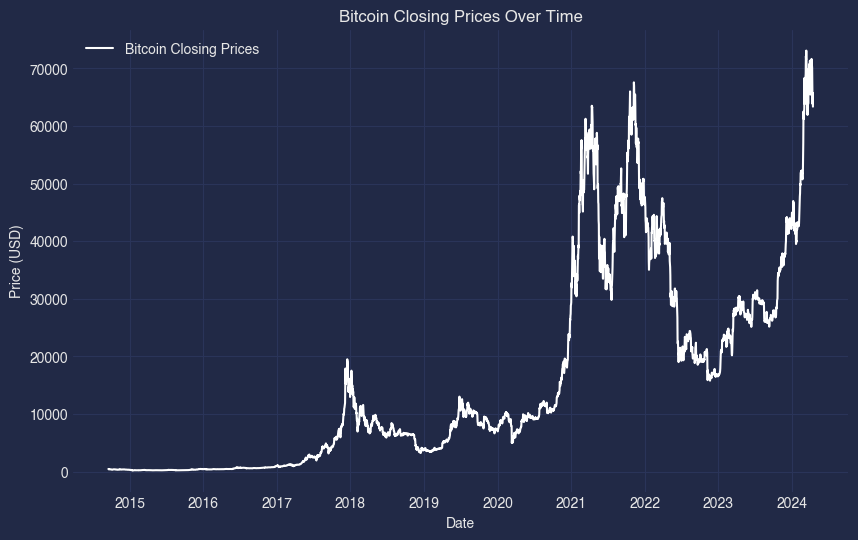

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the custom style from a GitHub repository URL
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

# Create a new figure for plotting with specified dimensions
plt.figure(figsize=(10, 6))

# Assuming 'df' is the DataFrame containing the Bitcoin data and it has a column named 'Close' for closing prices
# Plotting the closing prices of Bitcoin with a white line color and adding a label for the legend
sns.lineplot(data=btc['close'], color='white', label='Bitcoin Closing Prices')

# Setting the title of the plot
plt.title('Bitcoin Closing Prices Over Time')

# Setting the labels for x-axis and y-axis
plt.xlabel('Date')
plt.ylabel('Price (USD)')

# Displaying the legend in the plot
plt.legend()

# Displaying the plot on the screen
plt.show()

In [42]:
# Calculate the daily percentage change in the 'Close' price of Bitcoin and store it in a new column 'Daily_Percentage_Change'.
# The `pct_change()` function calculates the percentage change between the current and prior element.
btc['Daily_Percentage_Change'] = btc['close'].pct_change()

# Create a new column 'Profit_Loss' in the DataFrame. This column will contain a 1 if the daily percentage change is positive 
# (indicating a profit), and a 0 if negative (indicating a loss). The decision is made using a lambda function applied to each value 
# in 'Daily_Percentage_Change'.
btc['Profit_Loss'] = btc['Daily_Percentage_Change'].apply(lambda x: 1 if x > 0 else 0)

In [43]:
print(btc.tail())  # Display the last few rows of the DataFrame

                                   open          high           low  \
2024-04-11 00:00:00+00:00  70575.734375  71256.234375  69571.812500   
2024-04-12 00:00:00+00:00  70061.382812  71222.742188  65254.835938   
2024-04-13 00:00:00+00:00  67188.375000  67931.429688  60919.105469   
2024-04-14 00:00:00+00:00  63836.230469  65824.429688  62205.851562   
2024-04-15 00:00:00+00:00  65757.312500  66798.000000  62705.246094   

                                  close       volume  edit_count  sentiment  \
2024-04-11 00:00:00+00:00  70060.609375  30153382941    0.333333  -0.096713   
2024-04-12 00:00:00+00:00  67195.867188  44129299406    0.333333  -0.096713   
2024-04-13 00:00:00+00:00  63821.472656  52869738185    0.333333  -0.096713   
2024-04-14 00:00:00+00:00  65738.726562  49084320047    0.333333  -0.096713   
2024-04-15 00:00:00+00:00  63354.070312  46223949824    0.333333  -0.096713   

                           neg_sentiment      tomorrow  target  ...    edit_7  \
2024-04-11 00:00:

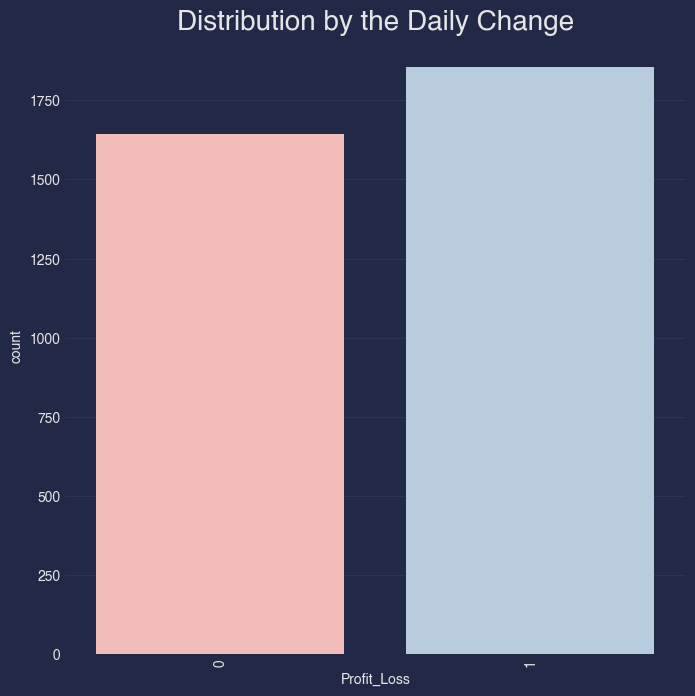

In [45]:
# Set a custom plot style from an external URL. This style applies a dark theme named 'pitayasmoothie-dark' from the specified GitHub repository.
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

# Create a new figure for plotting with dimensions set to 8x8 inches for better visibility and square aspect ratio.
plt.figure(figsize=(8, 8))

# Create a count plot using seaborn to visualize the distribution of 'Profit_Loss' data in the BTC DataFrame.
# 'Profit_Loss' is used as the categorical x-axis variable, and 'Pastel1' palette is used to color the bars.
sns.countplot(data=btc, x='Profit_Loss', palette='Pastel1')

# Rotate the x-axis labels by 90 degrees to prevent overlap and enhance readability.
plt.xticks(rotation=90)

# Set the title of the plot with a custom font size of 20 to emphasize the chart's subject.
plt.title('Distribution by the Daily Change', fontsize=20)

# Display the plot on the screen. This command must be called to render the plot when not using interactive environments.
plt.show()

In [48]:
btcsample = btc[-250:]

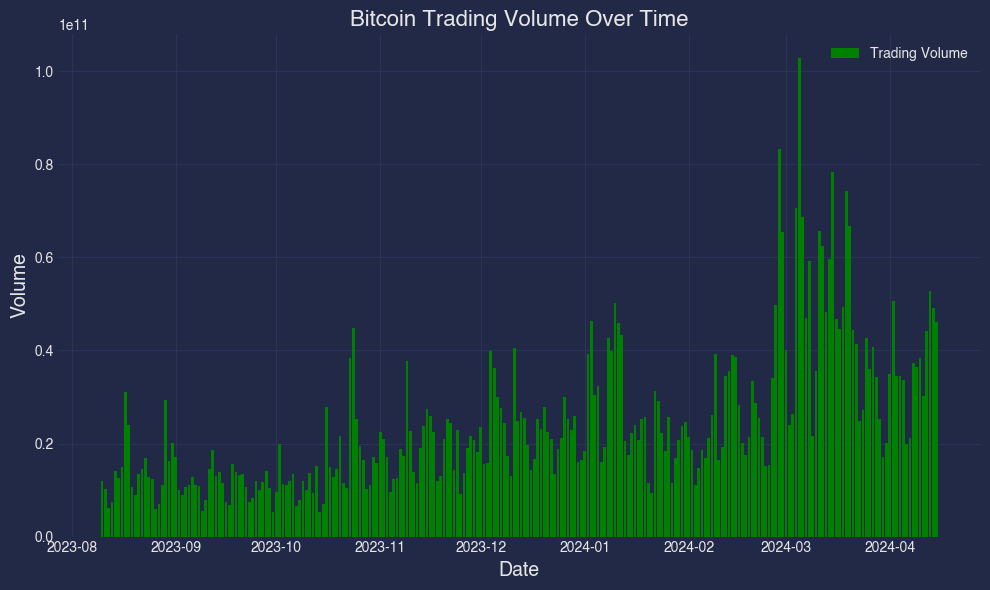

In [51]:
# Create a new figure for plotting with a specified size of 10 inches wide by 6 inches tall to provide ample space for data visualization.
plt.figure(figsize=(10, 6))

# Create a bar chart to visualize the trading volume of Bitcoin over time. The bars are colored green to enhance visual distinction,
# and a label 'Trading Volume' is added for identification in the legend.
plt.bar(btcsample.index, btcsample['volume'], color='green', label='Trading Volume')

# Set the title of the chart with a custom font size of 16 to emphasize the topic and improve readability.
plt.title('Bitcoin Trading Volume Over Time', fontsize=16)

# Label the x-axis as 'Date' with a font size of 14, clarifying the data represented along this axis.
plt.xlabel('Date', fontsize=14)

# Label the y-axis as 'Volume' with a font size of 14, indicating the metric being measured.
plt.ylabel('Volume', fontsize=14)

# Display the legend to identify the plotted data, helping viewers understand the meaning of the green bars.
plt.legend()

# Adjust the layout to make sure all plot components fit neatly within the figure canvas without any overlap.
plt.tight_layout()

# Display the plot on the screen. This function call is necessary to render the plot when using matplotlib in non-interactive environments.
plt.show()

/var/folders/9m/wyctr7ld6vg0x1kjlmlh42hh0000gn/T/ipykernel_95263/1368891608.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btcsample.loc[:, 'MA10'] = btcsample['close'].rolling(window=10).mean().values
/var/folders/9m/wyctr7ld6vg0x1kjlmlh42hh0000gn/T/ipykernel_95263/1368891608.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btcsample.loc[:, 'MA20'] = btcsample['close'].rolling(window=20).mean().values
/var/folders/9m/wyctr7ld6vg0x1kjlmlh42hh0000gn/T/ipykernel_95263/1368891608.py:11: SettingWithCopy

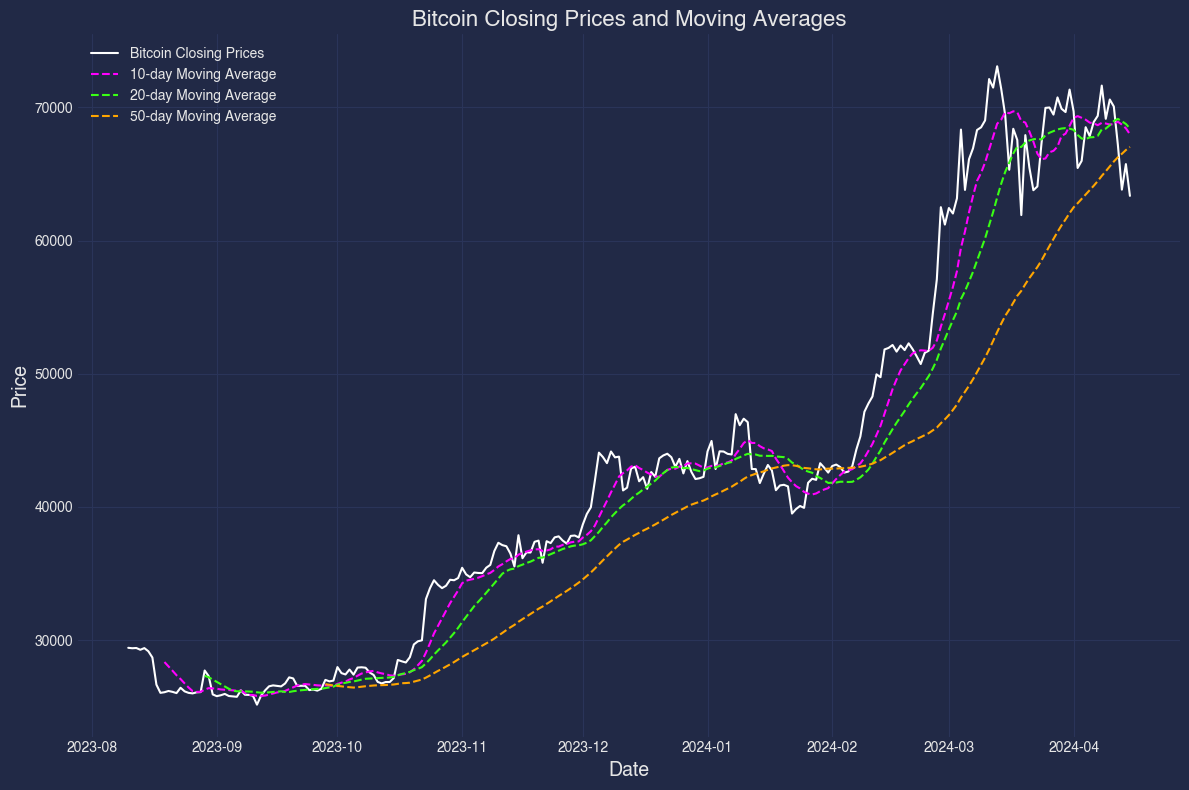

In [52]:
# Create a copy of the BTCsample DataFrame to preserve the original data while making modifications.
btcsample_copy = btcsample.copy()

# Calculate and assign the 10-day moving average of the 'Close' prices to a new column 'MA10' in the BTCsample DataFrame.
btcsample.loc[:, 'MA10'] = btcsample['close'].rolling(window=10).mean().values

# Calculate and assign the 20-day moving average of the 'Close' prices to a new column 'MA20'.
btcsample.loc[:, 'MA20'] = btcsample['close'].rolling(window=20).mean().values

# Calculate and assign the 50-day moving average of the 'Close' prices to a new column 'MA50'.
btcsample.loc[:, 'MA50'] = btcsample['close'].rolling(window=50).mean().values

# Create a new figure for plotting with specified dimensions of 12 inches by 8 inches to provide a clear view of the data.
plt.figure(figsize=(12, 8))

# Plot the closing prices of Bitcoin. The data points are represented as a continuous line colored white.
plt.plot(btcsample.index, btcsample['close'], label='Bitcoin Closing Prices', color='white')

# Plot the 10-day moving average with a dashed neon magenta line to distinguish this moving average visually.
plt.plot(btcsample.index, btcsample['MA10'], label='10-day Moving Average', linestyle='--', color='#FF00FF')

# Plot the 20-day moving average with a dashed neon green line, providing a visual contrast with other lines.
plt.plot(btcsample.index, btcsample['MA20'], label='20-day Moving Average', linestyle='--', color='#39FF14')

# Plot the 50-day moving average with a dashed neon orange line, making it easily distinguishable.
plt.plot(btcsample.index, btcsample['MA50'], label='50-day Moving Average', linestyle='--', color='#FFA500')

# Set the title of the chart with a specific font size to emphasize the analysis topic.
plt.title('Bitcoin Closing Prices and Moving Averages', fontsize=16)

# Label the x-axis with 'Date' and set its font size for clarity.
plt.xlabel('Date', fontsize=14)

# Label the y-axis with 'Price' and set its font size, indicating the data metric being measured.
plt.ylabel('Price', fontsize=14)

# Display the legend to identify each line plot, aiding in the visual interpretation of the data trends.
plt.legend()

# Adjust the layout of the plot elements to ensure everything is visible and well-spaced within the plot area.
plt.tight_layout()

# Display the plot on the screen. This call is necessary to render the plot visually in non-interactive Python environments.
plt.show()

In [53]:
# Display the last five rows of the BTC DataFrame to inspect the most recent data entries. 
# The .tail() method is useful for quickly checking the latest values in a dataset, particularly in financial time series like this one.
btc.tail()

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target,...,edit_7,trend_7,close_ratio_60,edit_60,trend_60,close_ratio_365,edit_365,trend_365,Daily_Percentage_Change,Profit_Loss
2024-04-11 00:00:00+00:00,70575.734375,71256.234375,69571.812500,70060.609375,30153382941,0.333333,-0.096713,0.133333,67195.867188,0,...,0.276190,0.571429,1.102768,0.768333,0.583333,1.857822,1.924475,0.512329,-0.007470,0
2024-04-12 00:00:00+00:00,70061.382812,71222.742188,65254.835938,67195.867188,44129299406,0.333333,-0.096713,0.133333,63821.472656,0,...,0.285714,0.571429,1.052915,0.771667,0.566667,1.777106,1.924384,0.509589,-0.040889,0
2024-04-13 00:00:00+00:00,67188.375000,67931.429688,60919.105469,63821.472656,52869738185,0.333333,-0.096713,0.133333,65738.726562,1,...,0.295238,0.428571,0.996377,0.772778,0.566667,1.683798,1.924292,0.506849,-0.050217,0
2024-04-14 00:00:00+00:00,63836.230469,65824.429688,62205.851562,65738.726562,49084320047,0.333333,-0.096713,0.133333,63354.070312,0,...,0.304762,0.428571,1.022607,0.775000,0.566667,1.729951,1.924201,0.509589,0.030041,1
2024-04-15 00:00:00+00:00,65757.312500,66798.000000,62705.246094,63354.070312,46223949824,0.333333,-0.096713,0.133333,NaN,0,...,0.314286,0.285714,0.982604,0.776667,0.550000,1.663236,1.924110,0.509589,-0.036275,0


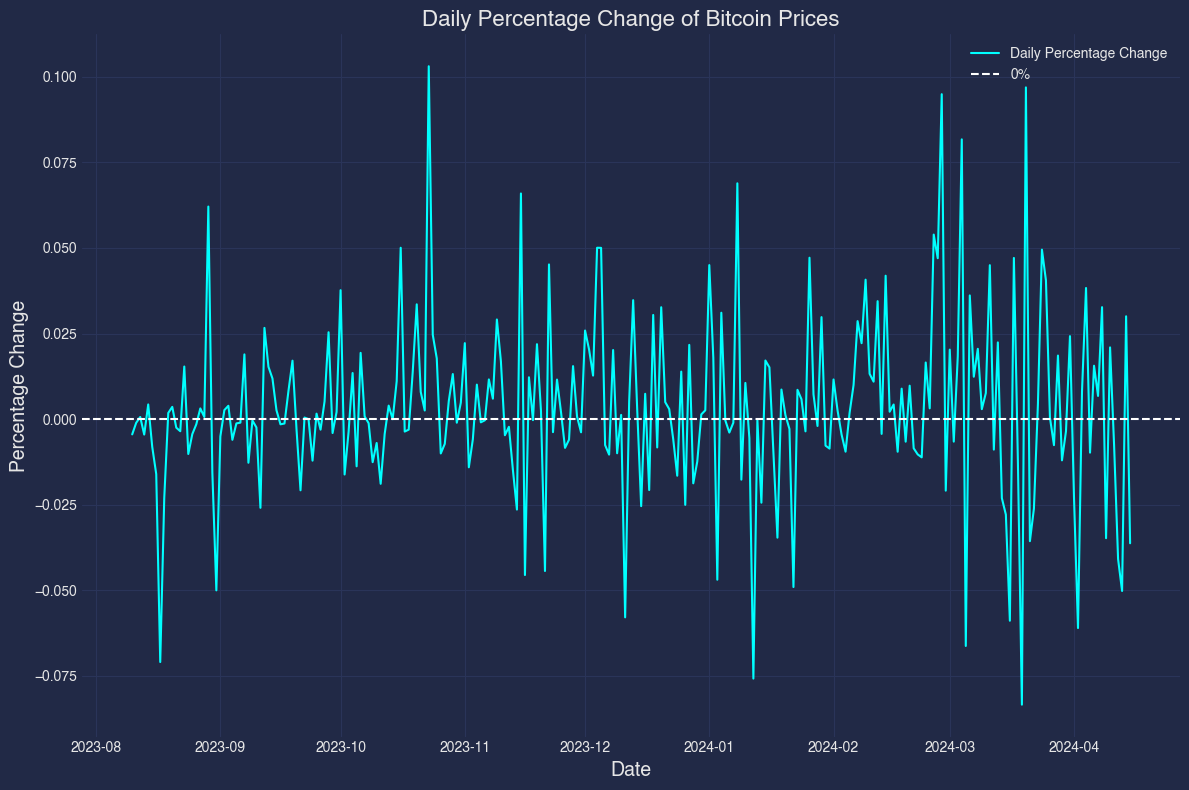

In [54]:
# Create a new figure for plotting with specific dimensions of 12 inches by 8 inches to provide ample space for detailed visualization.
plt.figure(figsize=(12, 8))

# Plot the daily percentage change of Bitcoin prices from the BTCsample DataFrame.
# The data points are represented as a continuous line colored cyan (#00FFFF).
plt.plot(btcsample.index, btcsample['Daily_Percentage_Change'], label='Daily Percentage Change', color='#00FFFF')

# Add a horizontal line at y=0, using a white dashed line to indicate the 'no change' level. This helps in visualizing days with no gains or losses.
plt.axhline(y=0, color='white', linestyle='--', label='0%')

# Set the title of the chart with a specific font size of 16 to clearly indicate the subject of the plot.
plt.title('Daily Percentage Change of Bitcoin Prices', fontsize=16)

# Label the x-axis as 'Date' and set its font size to 14 for clarity, explaining what the horizontal axis represents.
plt.xlabel('Date', fontsize=14)

# Label the y-axis as 'Percentage Change' with a font size of 14 to clarify the metric being displayed.
plt.ylabel('Percentage Change', fontsize=14)

# Display the legend to identify each element in the plot, aiding in the visual interpretation of what the lines represent.
plt.legend()

# Adjust the layout to ensure all components of the plot are neatly arranged and visible within the plot area.
plt.tight_layout()

# Display the plot on the screen. This function call is necessary to render the plot when using matplotlib in non-interactive Python environments.
plt.show()

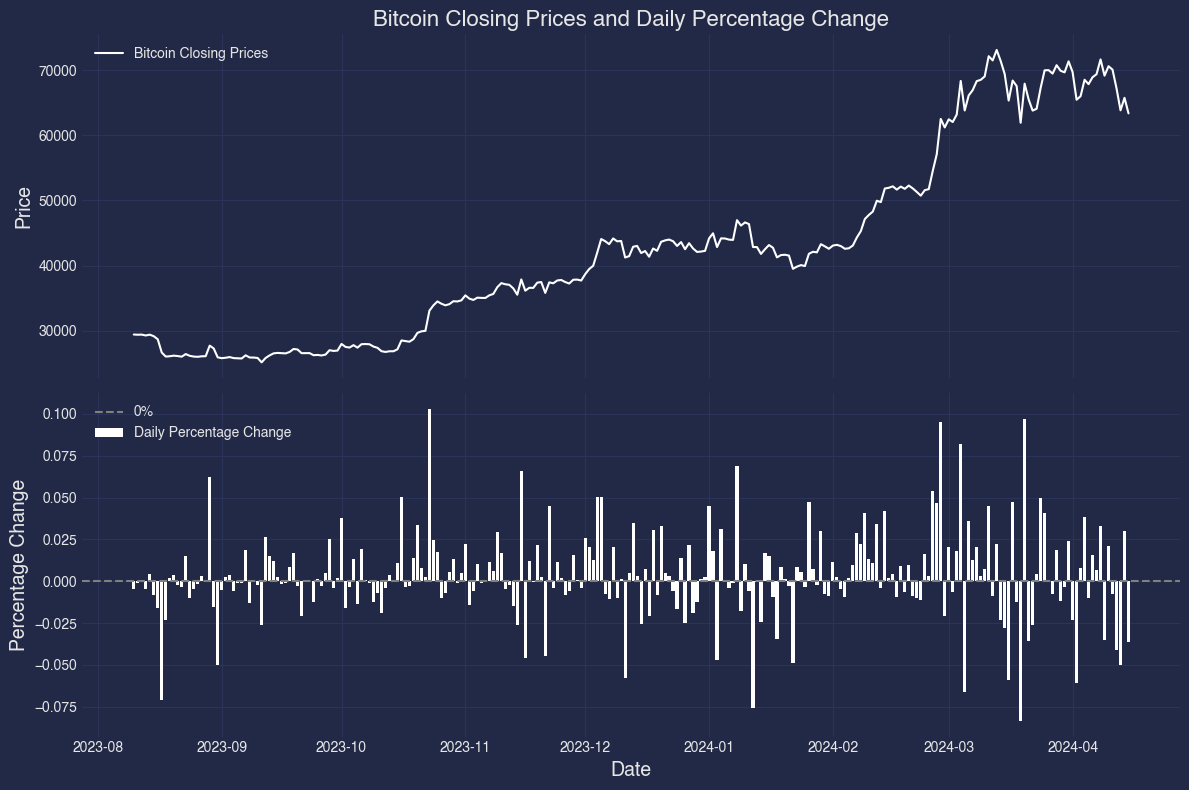

In [58]:
# Initialize a figure with two subplots (ax1 and ax2) arranged vertically, sharing the same x-axis, and set the figure size to 12x8 inches.
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot the closing prices of Bitcoin on the first subplot (ax1). Use a white line for visibility.
# Add a label for the legend that identifies the data.
ax1.plot(btcsample.index, btcsample['close'], label='Bitcoin Closing Prices', color='white')
# Set the title for the subplot, which also serves as the title for the entire figure, emphasizing both plots' themes.
ax1.set_title('Bitcoin Closing Prices and Daily Percentage Change', fontsize=16)
# Set the y-axis label of the first subplot to 'Price', with a font size of 14 for clarity.
ax1.set_ylabel('Price', fontsize=14)
# Add a legend to the first subplot to help identify the plotted data.
ax1.legend()

# Plot the daily percentage change of Bitcoin on the second subplot (ax2) using a bar graph with white bars for contrast.
# Add a label for the legend that identifies the data.
ax2.bar(btcsample.index, btcsample['Daily_Percentage_Change'], label='Daily Percentage Change', color='white')
# Add a horizontal line at y=0 on the second subplot, using a gray dashed line to indicate the 'no change' level,
# aiding in visualizing neutrality in percentage change.
ax2.axhline(y=0, color='gray', linestyle='--', label='0%')
# Set the x-axis label of the second subplot to 'Date', with a font size of 14, indicating the timeline.
ax2.set_xlabel('Date', fontsize=14)
# Set the y-axis label of the second subplot to 'Percentage Change', with a font size of 14 to clarify what the vertical axis represents.
ax2.set_ylabel('Percentage Change', fontsize=14)
# Add a legend to the second subplot to help identify the plotted elements.
ax2.legend()

# Adjust the layout of the figure to ensure all components fit well and are clearly visible within the plot area.
plt.tight_layout()
# Display the entire figure with both subplots. This call renders the figure in the output.
plt.show()

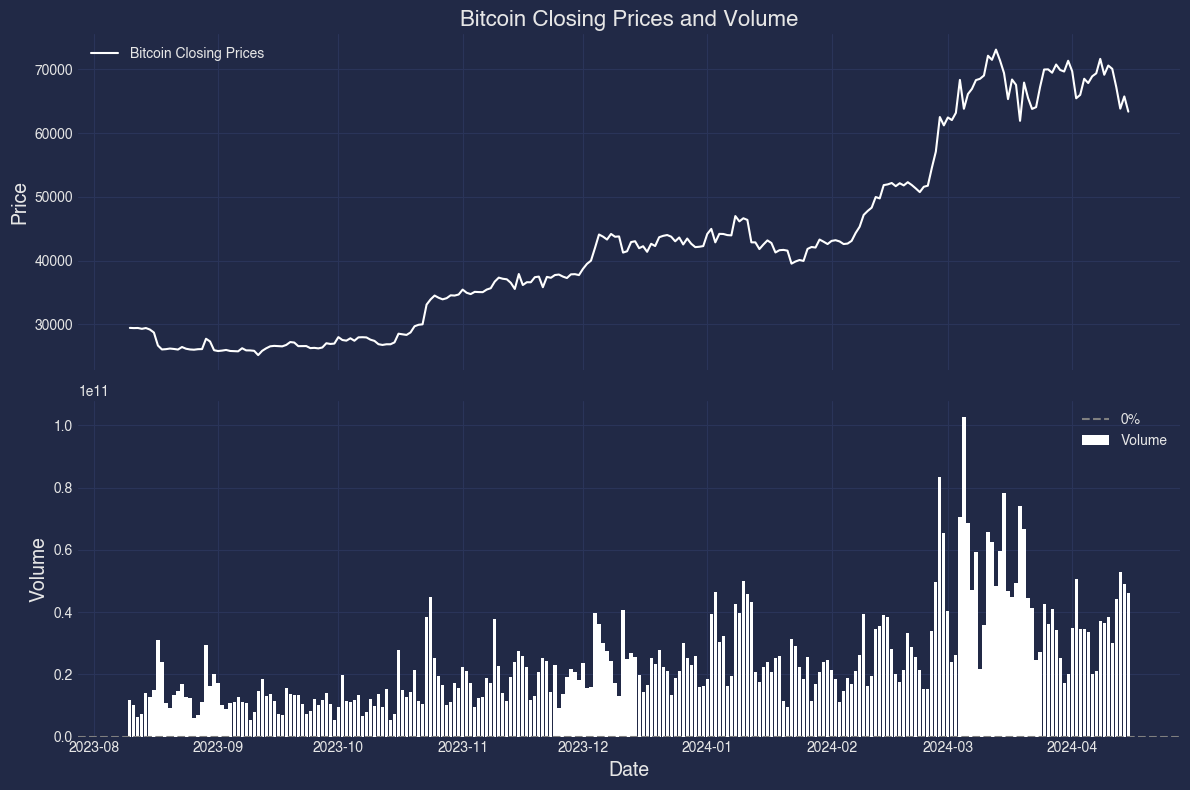

In [59]:
# Initialize a figure with two subplots (ax1 and ax2) arranged vertically, sharing the same x-axis for consistent date alignment, and set the figure size to 12x8 inches for better visibility.
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plotting Bitcoin closing prices on the first subplot (ax1).
# Use a white line for high contrast against the background, and add a label for the legend to identify this plot.
ax1.plot(btcsample.index, btcsample['close'], label='Bitcoin Closing Prices', color='white')
# Set a title for the first subplot to indicate the data being shown, with an increased font size for emphasis.
ax1.set_title('Bitcoin Closing Prices and Volume', fontsize=16)
# Label the y-axis to specify that this axis represents the price of Bitcoin.
ax1.set_ylabel('Price', fontsize=14)
# Display a legend in the first subplot to aid in identifying the plotted data.
ax1.legend()

# Plotting the trading volume of Bitcoin on the second subplot (ax2) using a bar chart for clear visual distinction of volume spikes.
# Bars are colored white for consistency with the first plot, and a label 'Volume' is added for the legend.
ax2.bar(btcsample.index, btcsample['volume'], label='Volume', color='white')
# Add a horizontal line at y=0 using a gray dashed line to mark the baseline for the volume, which helps in visual assessment.
ax2.axhline(y=0, color='gray', linestyle='--', label='0%')
# Set the x-axis label to 'Date', with an appropriate font size, ensuring it's readable and indicates the timeline.
ax2.set_xlabel('Date', fontsize=14)
# Label the y-axis to specify that this axis shows the volume of Bitcoin traded.
ax2.set_ylabel('Volume', fontsize=14)
# Include a legend in the second subplot to clearly mark the data representation, facilitating easier interpretation.
ax2.legend()

# Adjust the layout to ensure that all plot components fit well within the figure canvas without any overlap or clutter.
plt.tight_layout()
# Display the plot on the screen. This function call is crucial for rendering the figure in non-interactive Python environments.
plt.show()

In [61]:
import numpy as np
# Calculate the standard deviation of the daily percentage changes in Bitcoin prices using numpy's std function.
# This measurement helps quantify the volatility of Bitcoin's price movements.
std_deviation = np.std(btc['Daily_Percentage_Change'])

# Print the calculated standard deviation with a precision of four decimal places.
# This precision is useful for accurately assessing the extent of price fluctuations.
print(f"Standard Deviation of Daily Percentage Changes: {std_deviation:.4f}")

# Use conditional statements to classify the risk level based on the standard deviation.
# A lower standard deviation indicates less volatility and thus lower risk.
if std_deviation <= 0.02:
    print("Low Risk")
elif 0.02 < std_deviation <= 0.05:
    print("Moderate Risk")
else:
    print("High Risk")
# These thresholds (0.02 and 0.05) are arbitrary and can be adjusted based on further risk assessment studies or investment thresholds.

Standard Deviation of Daily Percentage Changes: 0.0368
Moderate Risk


In [62]:
# Import TensorFlow for building deep learning models and MinMaxScaler from sklearn for data normalization.
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Reshape the 'Close' column of the BTC DataFrame to a format suitable for scaling, i.e., a column vector.
closing_prices = btc['close'].values.reshape(-1, 1)

# Initialize the MinMaxScaler, which scales each feature to a given range, usually between zero and one.
scaler = MinMaxScaler()

# Fit and transform the closing prices using the scaler. This normalization is a common preprocessing step for neural network inputs.
scaled_prices = scaler.fit_transform(closing_prices)

# Determine the size of the training dataset to be 80% of the total data.
train_size = int(len(scaled_prices) * 0.8)

# Split the scaled data into training and testing datasets based on the calculated train_size.
train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:]

# Define a function to create sequences from the dataset, which are needed for training LSTM models.
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length]
        sequences.append(seq)
    return np.array(sequences)

# Set the sequence length, which is the number of time steps the LSTM model will look back.
sequence_length = 10  # This can be adjusted based on the specific temporal structure of the data.

# Generate training and testing data sequences using the defined function and sequence length.
X_train = create_sequences(train_data, sequence_length)
X_test = create_sequences(test_data, sequence_length)

# Construct the LSTM model with two LSTM layers separated by dropout layers to prevent overfitting.
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(sequence_length, 1), return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(50, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

# Compile the model using the Adam optimizer and mean squared error loss function, which is common for regression problems.
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on the training data, using the earlier part of each sequence as input and the next value as output.
# The model runs for 10 epochs with a batch size of 16, which are parameters that can be tuned during the model optimization process.
model.fit(X_train, train_data[sequence_length:], epochs=10, batch_size=16)

Epoch 1/10
175/175 [==============================] - 1s 3ms/step - loss: 0.0081
Epoch 2/10
175/175 [==============================] - 1s 3ms/step - loss: 0.0017
Epoch 3/10
175/175 [==============================] - 1s 4ms/step - loss: 0.0017
Epoch 4/10
175/175 [==============================] - 1s 3ms/step - loss: 0.0016
Epoch 5/10
175/175 [==============================] - 1s 3ms/step - loss: 0.0017
Epoch 6/10
175/175 [==============================] - 1s 3ms/step - loss: 0.0015
Epoch 7/10
175/175 [==============================] - 1s 3ms/step - loss: 0.0012
Epoch 8/10
175/175 [==============================] - 1s 3ms/step - loss: 0.0014
Epoch 9/10
175/175 [==============================] - 1s 3ms/step - loss: 0.0012
Epoch 10/10
175/175 [==============================] - 1s 3ms/step - loss: 0.0012


In [63]:
predicted_scaled_prices = model.predict(X_test)

22/22 [==============================] - 0s 1ms/step


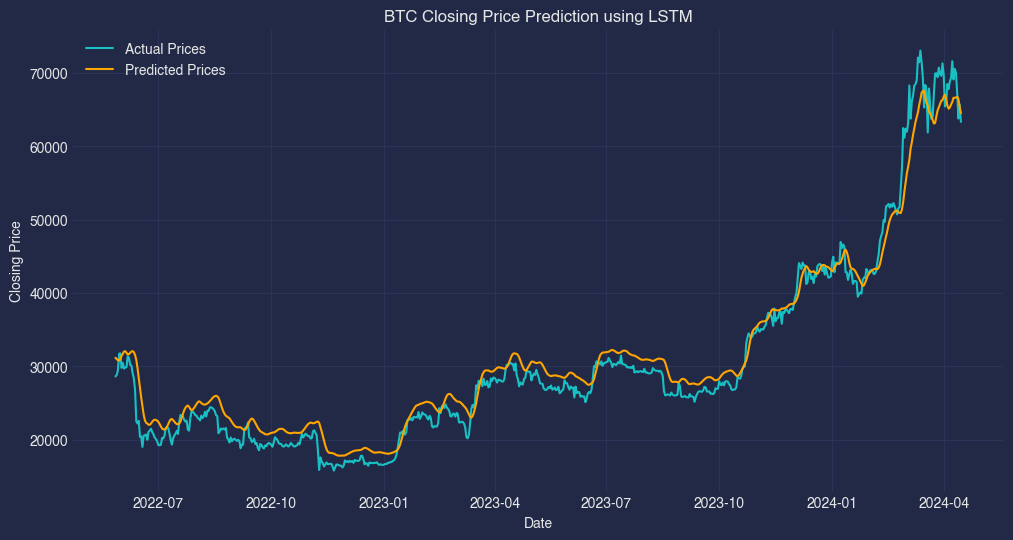

In [65]:
# Convert the predicted scaled prices back to their original scale using the inverse transformation of the scaler.
# This step is essential to compare the predicted prices to the actual prices in their original units.
predicted_prices = scaler.inverse_transform(predicted_scaled_prices)

# Initialize a plot with a specific size (12 inches wide by 6 inches tall) to ensure all details are visible.
plt.figure(figsize=(12, 6))

# Plot the actual closing prices on the graph. The data starts from 'train_size + sequence_length' to avoid the initial training set and sequence length.
# This plot shows the real Bitcoin closing prices as a baseline for comparison.
plt.plot(btc.index[train_size+sequence_length:], closing_prices[train_size+sequence_length:], label='Actual Prices')

# Plot the predicted prices using an orange line for visibility and distinction from the actual prices.
# The predicted prices are plotted over the same indices as the actual prices for direct comparison.
plt.plot(btc.index[train_size+sequence_length:], predicted_prices, label='Predicted Prices', color='orange')

# Set the title of the chart to 'BTC Closing Price Prediction using LSTM' to describe the content and method used for prediction.
plt.title('BTC Closing Price Prediction using LSTM')

# Label the x-axis as 'Date' to indicate the time frame of the data being plotted.
plt.xlabel('Date')

# Label the y-axis as 'Closing Price' to indicate the monetary value of the Bitcoin prices.
plt.ylabel('Closing Price')

# Add a legend to the plot to help distinguish between the actual and predicted prices.
plt.legend()

# Display the plot. This command renders the visualization on the screen, crucial for seeing the comparison between actual and predicted prices.
plt.show()

In [66]:
# Assign the scaled prices to full_train_data for clarity, indicating that the entire dataset will be used for model training.
# Using the full dataset can maximize the learning potential and improve model performance.
full_train_data = scaled_prices

# Generate sequences from the full dataset using the previously defined create_sequences function.
# The function takes the full dataset and the sequence_length as inputs to produce a series of sequential data points.
# These sequences are necessary for training the LSTM model, which requires input data in the form of sequences to capture temporal dependencies.
X_full_train = create_sequences(full_train_data, sequence_length)

In [67]:
future_predictions_scaled = model.predict(X_full_train[-50:])

2/2 [==============================] - 0s 2ms/step


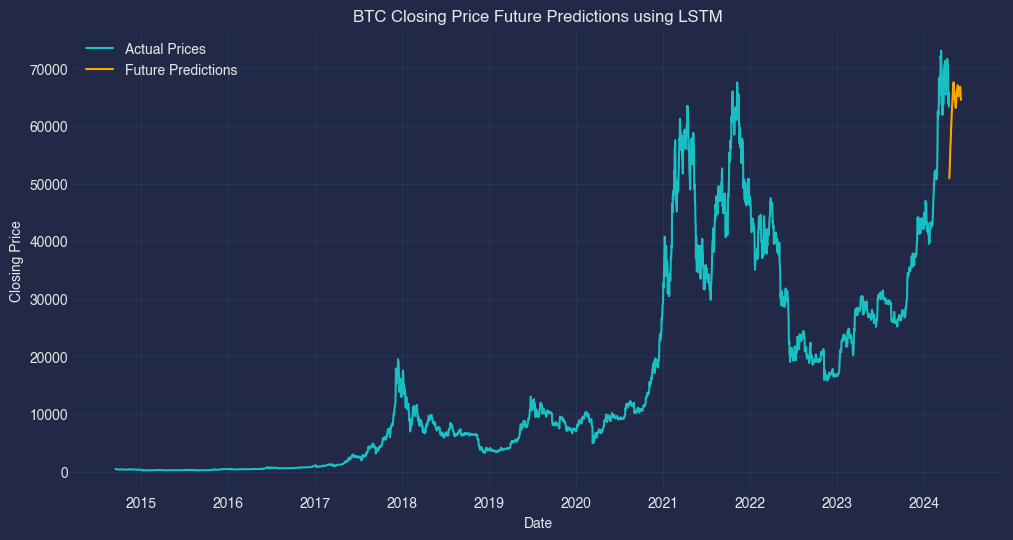

In [70]:
# Convert the scaled predictions back to their original scale using the inverse transformation of the scaler.
# This is crucial for making the predicted values comparable to the actual historical prices.
future_predictions = scaler.inverse_transform(future_predictions_scaled)

# Initialize a plot with a specified size (12 inches wide by 6 inches tall) to ensure all details are clearly visible.
plt.figure(figsize=(12, 6))

# Plot the actual closing prices of Bitcoin across the entire dataset.
# This line serves as a reference for comparing the historical data with the future predictions.
plt.plot(btc.index, closing_prices, label='Actual Prices')

# Plot the future predictions starting from the day after the last available data point.
# Generate a date range for 50 days beyond the last date in the BTC index to align with the number of future predictions.
# The color orange is used for these predictions to distinguish them from the actual historical data.
plt.plot(pd.date_range(start=btc.index[-1], periods=51, freq='D')[1:], future_predictions, label='Future Predictions', color='orange')

# Set the title of the chart to indicate that it displays future predictions for BTC closing prices using an LSTM model.
plt.title('BTC Closing Price Future Predictions using LSTM')

# Label the x-axis as 'Date' to indicate the timeline of the data being plotted.
plt.xlabel('Date')

# Label the y-axis as 'Closing Price' to indicate the monetary value of the Bitcoin prices being plotted.
plt.ylabel('Closing Price')

# Add a legend to the plot to help distinguish between actual historical prices and future predictions.
plt.legend()

# Display the plot. This command renders the visualization on the screen, crucial for visual analysis of predicted versus actual prices.
plt.show()

In [73]:
import pandas as pd

# Create a date range for the predicted prices, starting the day after the last date in the BTC data.
prediction_dates = pd.date_range(start=btc.index[-1] + pd.Timedelta(days=1), periods=len(future_predictions), freq='D')

# Create a DataFrame for the future predictions.
future_df = pd.DataFrame(data=future_predictions, index=prediction_dates, columns=['Predicted Closing Price'])

# Convert the historical closing prices into a DataFrame for consistency.
historical_df = pd.DataFrame(data=closing_prices, index=btc.index, columns=['Actual Closing Price'])

# Concatenate the historical and future DataFrames for a continuous view.
full_df = pd.concat([historical_df, future_df])

# Print the DataFrame to display the results.
print(full_df.tail(60))  # Display the last 60 entries to see some of the historical data and all the predictions.

                           Actual Closing Price  Predicted Closing Price
2024-04-06 00:00:00+00:00          68896.109375                      NaN
2024-04-07 00:00:00+00:00          69362.554688                      NaN
2024-04-08 00:00:00+00:00          71631.359375                      NaN
2024-04-09 00:00:00+00:00          69139.015625                      NaN
2024-04-10 00:00:00+00:00          70587.882812                      NaN
2024-04-11 00:00:00+00:00          70060.609375                      NaN
2024-04-12 00:00:00+00:00          67195.867188                      NaN
2024-04-13 00:00:00+00:00          63821.472656                      NaN
2024-04-14 00:00:00+00:00          65738.726562                      NaN
2024-04-15 00:00:00+00:00          63354.070312                      NaN
2024-04-16 00:00:00+00:00                   NaN             50927.636719
2024-04-17 00:00:00+00:00                   NaN             51437.765625
2024-04-18 00:00:00+00:00                   NaN    